## Checando Animais no Zoologico 

In [1]:
#importando bibliotecas
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from itertools import combinations
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Analisando dataframe
df = pd.read_csv('c:/csv/zoo/zoo.csv')
df.head()

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
0,porco formigueiro,1,0,0,1,0,0,1,1,1,1,0,0,0,4,1
1,antílope,1,0,0,1,0,0,0,1,1,1,0,0,1,4,1
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
3,urso,1,0,0,1,0,0,1,1,1,1,0,0,0,4,1
4,javali,1,0,0,1,0,0,1,1,1,1,0,0,1,4,1


In [3]:
#checando linhas e colunas
df.shape

(101, 16)

In [4]:
#mapeando tipos
tipo = {1:'mamifero', 2:'passaro', 3:'reptil',
       4:'peixe', 5:'anfibio', 6:'inseto', 7:'invertebrado'}

In [5]:
#checando como as variaveis se correlacionam
comb_var = list(combinations(df.columns[1:-2], 2))
result = []

#checando quantas vezes cada uma das features se correlacionam
for c in comb_var:
    if c[0] != c[1]:
        sim = sum((df[c[0]] != df[c[1]]))/len(df)
        result.append((c[0], c[1], sim))

In [6]:
#checando relacionamentos
df_res = pd.DataFrame(result, columns = ['var1', 'var2', 'metrica'])
df_res.sort_values(by=['metrica'])

,var1,var2,metrica
2,pelos,leite,0.059406
71,espinha_dorsal,cauda,0.099010
14,penas,salta,0.118812
55,aquatico,nadadeiras,0.188119
36,leite,dentes,0.217822
...,...,...,...
69,espinha_dorsal,venenoso,0.821782
53,aquatico,respira,0.831683
73,respira,nadadeiras,0.881188
1,pelos,ovos,0.910891


In [7]:
#checando caracteristicas de animais aquaticos
df[df['aquatico'] ==1]

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
7,carpa,0,0,1,0,0,1,0,1,1,0,0,1,1,0,4
8,bagre,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
14,caranguejo,0,0,1,0,0,1,1,0,0,0,0,0,0,4,7
15,lagostim,0,0,1,0,0,1,1,0,0,0,0,0,0,6,7
18,cação,0,0,1,0,0,1,1,1,1,0,0,1,1,0,4
19,golfinho,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1
21,pato,0,1,1,0,1,1,0,0,1,1,0,0,1,2,2
25,sapo,0,0,1,0,0,1,1,1,1,1,0,0,0,4,5


In [8]:
#retirando colunas deleites e ovos, por elas sempre aparecerem invertidas
df_new = df.drop(columns = ['leite', 'ovos'])

In [9]:
#gerando matriz
X = df_new.iloc[:, 1:-1]
X

,pelos,penas,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas
0,1,0,0,0,1,1,1,1,0,0,0,4
1,1,0,0,0,0,1,1,1,0,0,1,4
2,0,0,0,1,1,1,1,0,0,1,1,0
3,1,0,0,0,1,1,1,1,0,0,0,4
4,1,0,0,0,1,1,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,0,0,1,1,1,0,0,1,2
97,1,0,1,0,0,0,0,1,1,0,0,6
98,1,0,0,0,1,1,1,1,0,0,1,4
99,0,0,0,0,0,0,0,1,0,0,0,0


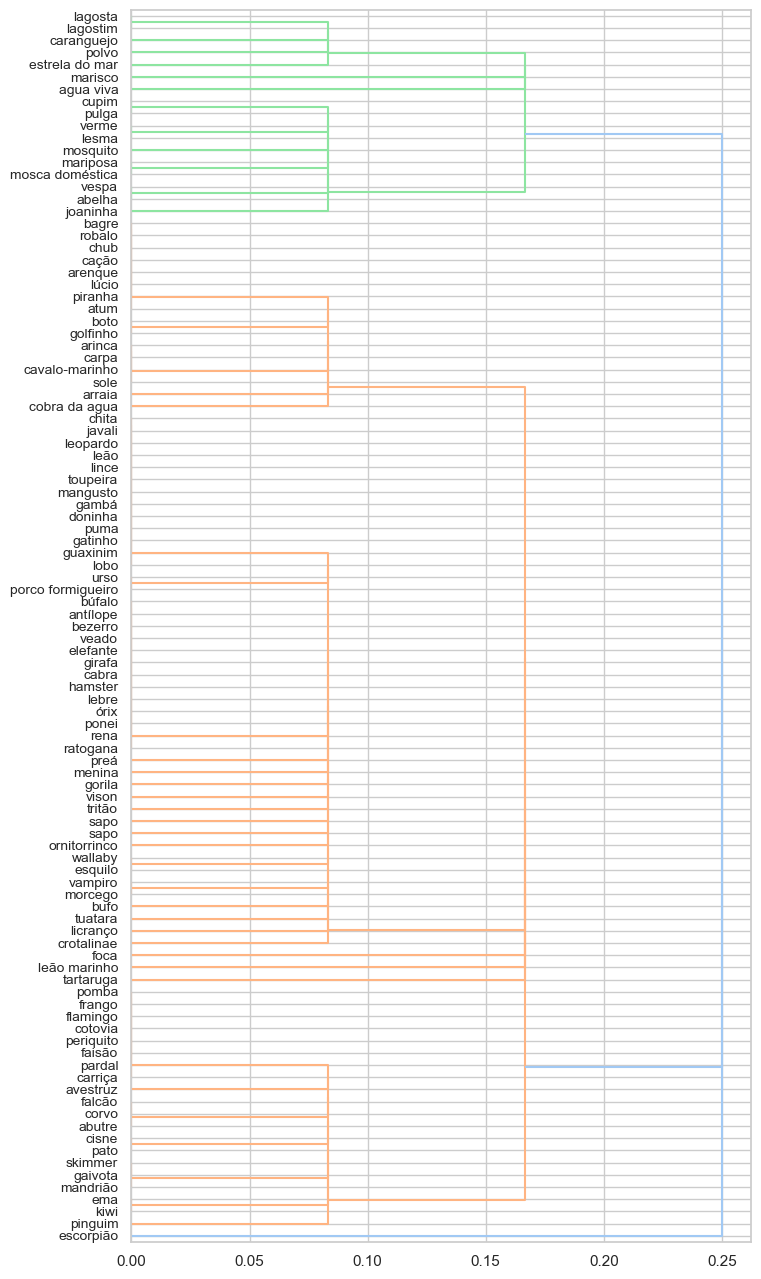

In [10]:
#Agrupamento hierarquico
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))
dendrogram(Z,  truncate_mode=None, labels=list(df.animal),
           orientation='right',
           leaf_font_size=10,leaf_rotation=0,);

In [11]:
#definindo grupos (total 11)
fcluster(Z, .1, criterion='distance')

array([ 2,  2,  3,  2,  2,  2,  2,  3,  3,  2,  2,  1,  3,  9,  8,  8,  1,
        2,  3,  3,  1,  1,  2,  1,  7,  2,  2,  2,  2,  2,  7,  2,  2,  1,
        3,  2,  2,  1,  3,  7,  7,  1,  7,  1,  2,  2,  8,  2,  2,  2,  2,
        7,  2,  8,  2,  2,  1,  1,  1,  1,  3,  3,  2,  2,  2,  2,  3,  2,
        2,  2,  2,  1, 11,  3,  4,  5,  3, 10,  1,  1,  2,  7,  3,  1,  2,
        8,  3,  1,  7,  2,  6,  2,  3,  2,  2,  1,  2,  7,  2,  7,  1],
      dtype=int32)

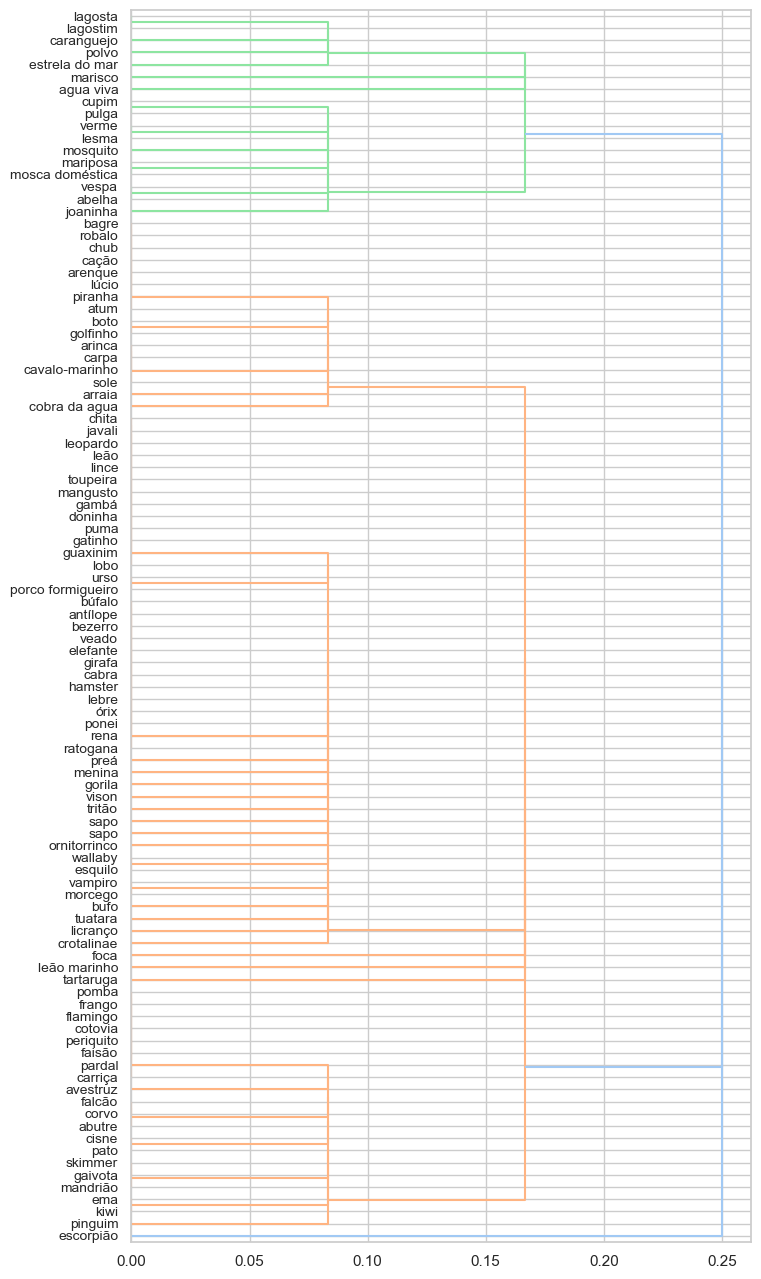

In [12]:
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))
dendrogram(Z,  truncate_mode=None, labels=list(df.animal),
           orientation='right',
           leaf_font_size=10,leaf_rotation=0,);

In [13]:
#checando escorpião
df[df.animal == 'escorpião']

,animal,pelos,penas,ovos,leite,salta,aquatico,predador,dentes,espinha_dorsal,respira,venenoso,nadadeiras,cauda,pernas,tipo
72,escorpião,0,0,0,0,0,0,1,0,0,1,1,0,1,8,7


In [14]:
#mesmo fazendo sentido foi optado por remover ele
df_temp = df[df.animal != 'escorpião']
X = df_temp.iloc[:, 1:-1]

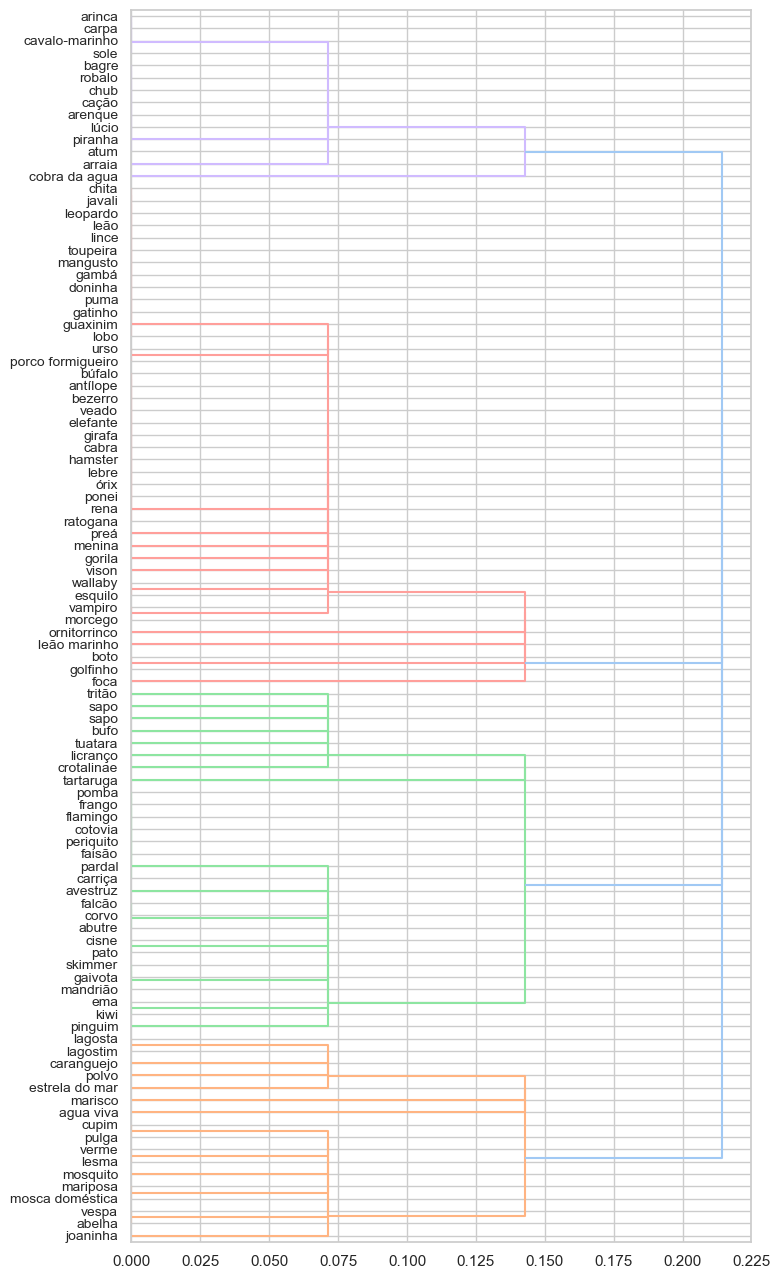

In [18]:
# Importa a função linkage da biblioteca scipy.cluster.hierarchy
Z = linkage(X, metric='hamming')

plt.figure(figsize=(8,16))#plotando o dendograma
dendrogram(Z,  truncate_mode=None, labels=list(df_temp.animal), # Define os rótulos dos ramos do dendrograma como os animais do DataFrame df_temp
           orientation='right',# Define a orientação do dendrograma como vertical
           leaf_font_size=10,leaf_rotation=0,);#  Define o tamanho da fonte dos rótulos dos ramos e define a rotação dos rótulos dos ramos


#se cortamos a analise no 0,15 é observado que tem 4 grupos
#se cortar +- no 0,7 é observado 14 grupos

In [19]:
fcluster(Z, .1, criterion='distance')

array([ 9,  9, 13,  9,  9,  9,  9, 13, 13,  9,  9,  5, 13,  3,  2,  2,  5,
        9, 13,  8,  5,  5,  9,  5,  1,  6,  6,  9,  9,  9,  1,  9,  9,  5,
       13,  9,  9,  5, 13,  1,  1,  5,  1,  5,  9,  9,  2,  9,  9,  9,  9,
        1,  6,  2,  9,  9,  5,  5,  5,  5, 13, 13,  6, 10,  9,  9,  8,  9,
        9,  9,  9,  5, 13, 12, 11, 14,  4,  5,  5,  6,  1, 13,  5,  9,  2,
       13,  5,  1,  6,  7,  6, 13,  9,  9,  5,  9,  1,  9,  1,  5],
      dtype=int32)

In [20]:
from sklearn import metrics

In [21]:
#checando o quão bom estão os grupos
#definindo o melhor corte pro grupo
distances = [.05, .1, .125, .15, .25]
y = df_temp['tipo'].values
for i in distances:
    labels = fcluster(Z, i, criterion='distance')
    print(f"k={len(set(labels))} corte={i} - rand index={metrics.rand_score(labels, y):.3f}")
#o corte 0,125 tem a maior taxa de indexação mas há 14 clusters o que não é tão interessante para analise
#o corte 0,15 tem uma indexação bem proxima e há somente 4 clusters o que o torna mais interessante pra analise

k=44 corte=0.05 - rand index=0.812
k=14 corte=0.1 - rand index=0.950
k=14 corte=0.125 - rand index=0.950
k=4 corte=0.15 - rand index=0.946
k=1 corte=0.25 - rand index=0.236


In [22]:
#alterando metrica pra analise
distances = [.05, .1, .125, .15, .25]
y = df_temp['tipo'].values
for i in distances:
    labels = fcluster(Z, i, criterion='distance')
    print(f"k={len(set(labels))} corte={i} - rand index={metrics.adjusted_rand_score(labels, y):.3f}")
#usando o rand score ajustado o corte 0,15 realmente é melhor

k=44 corte=0.05 - rand index=0.278
k=14 corte=0.1 - rand index=0.852
k=14 corte=0.125 - rand index=0.852
k=4 corte=0.15 - rand index=0.862
k=1 corte=0.25 - rand index=0.000
